### [1] PIL 모듈 - 오전 10시~11시
- PyTorch 전처리에서 PIL (Pillow)은 transforms 모듈을 통해 이미지 로드 후의 변환 및 증강에 주로 사용됩니다. 반면, OpenCV는 데이터셋 제작 과정에서 cv2.imread()를 사용해 이미지를 파일 시스템에서 빠르게 읽어오거나 BGR-RGB 색 공간 변환 등 초기 전처리에 활용됩니다. 이 둘은 각자의 강점을 바탕으로 딥러닝 파이프라인의 다른 단계에서 효율적으로 역할을 분담합니다.




#### [1-1] PIL 모듈 기본
- PIL (Python Imaging Library) 은 “파이썬에서 이미지를 쉽게 다루기 위한 기본 이미지 처리 라이브러리”
- 현재는 더 이상 업데이트되지 않고,그 후속 버전이 Pillow 로 이어짐.
- Numpy 배열이 아닌 이미지 객체 자료임
- !pip install Pillow  #코렙에서는 설치하지 않아도 됨

#### . 하단의 pip show 간단설명
- Summary: Python 이미지 라이브러리(PIL)의 포크 버전
  - Fork: 기존 프로젝트를 복사하여 새로운 방향으로 독립 개발
- License:  pip show 명령은 패키지의 setup.cfg나 pyproject.toml에서
license 필드 값을 출력하는데, Pillow는 해당 필드를 비워둔 채 대신 LICENSE 파일에 내용을 직접 넣어놓았습니다.
  - 공식라이센스내용:

          The Python Imaging Library (Pillow) is licensed under the HPND License
          and includes some code under other open source licenses (e.g., BSD, MIT).
  - 코드 수정, 재배포, 상업적 제품 포함 모두 가능
  - 저작권 표시와 라이선스 사본을 포함해야 함


In [ ]:
!pip show Pillow

Name: pillow
Version: 11.3.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.github.io
Author: 
Author-email: "Jeffrey A. Clark" <aclark@aclark.net>
License: 
Location: /usr/local/lib/python3.12/dist-packages
Requires: 
Required-by: bokeh, diffusers, dopamine_rl, fastai, gradio, ImageIO, matplotlib, scikit-image, sentence-transformers, torchtune, torchvision, wordcloud


(1024, 1024)
RGB


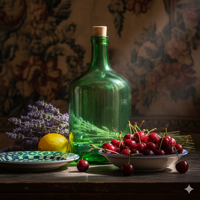

In [ ]:
from PIL import Image

# 이미지 열기
img = Image.open("img1.png")

# 이미지 보기
img.show()

#  크기 확인
print(img.size)   # (width, height)
print(img.mode)   # RGB, L(흑백), RGBA 등

#  크기 변경
img_resized = img.resize((200, 200))
img_resized

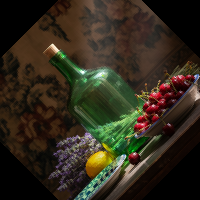

In [ ]:
#  회전
img_rotated = img_resized.rotate(45)
img_rotated




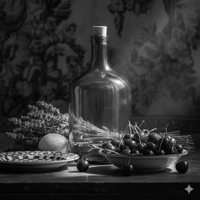

In [ ]:
###############################
## convert('RGB') 도 참고
##############################
img_gray = img_resized.convert("L")
img_gray

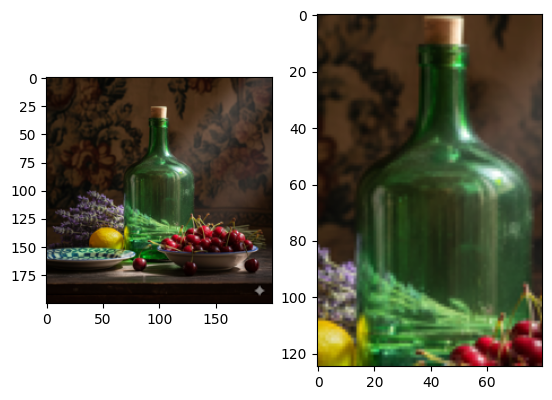

In [ ]:
# 잘림 구역을 확인하기 위하여 matplotlib로 구현함
import matplotlib.pyplot as plt


plt.subplot(1,2,1)
plt.imshow(img_resized)

plt.subplot(1,2,2,)

# 왼쪽(x1), 위쪽(y1), 오른쪽(x2), 아래쪽(y2) 좌표를 지정해서
# 아래의 이미지에서 병의 영역만 잘라내고자 할때
# 왼쪽에서 75,위에서 25인 지점을 시작점으로
# 왼쪽에서 150, 위에서 175인점을 끝점으로 사각으로 자르기
img_crop = img_resized.crop((55, 25, 135, 150))
plt.imshow(img_crop)

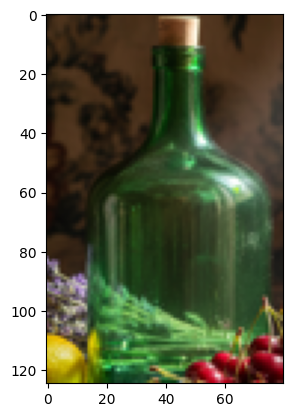

In [ ]:

import numpy as np
imgArry=np.array(img_resized)

#######################################
# x는 너비(w), y는 높이(h)
#  55(x)~135(x) / 25(y)~150(y)
#######################################
img_crop = img_resized.crop((55, 25, 135, 150))

plt.imshow(imgArry[25:150, 55:135,:])


#### [1-2] PIL 객체의 Array화_ 편차,평균 정규화
- PIL 이미지는 np.array로 행렬화함

In [42]:

import numpy as np

img= [
      [[0,8,0],[0,1,1]],
      [[2,0,8],[6,7,6]]
      ]

imgArr= np.array(img)
imgArr.mean(axis=(0)) #0번 shape기준(즉 높이기준, 열은 남기기)
# (0+2) / 2 ,   (8+0)/2


array([[1. , 4. , 4. ],
       [3. , 4. , 3.5]])

In [43]:
imgArr.mean(axis=(1))


array([[0. , 4.5, 0.5],
       [4. , 3.5, 7. ]])

In [45]:
imgArr.mean(axis=(0,1))
# R: (0+0+2+6) /4
# G: (8+1+0+7) /4
# B: (0+1+8+8) /4

array([2.  , 4.  , 3.75])

In [49]:
#####################################
# 평균값 목표로 이동
###################################3
target_mean = np.array([0.485, 0.456, 0.406])
adjusted = (imgArr - current_mean) + target_mean
adjusted.mean(axis=(0,1))


array([0.485, 0.456, 0.406])

##### 목표하는, 평균,편차 값으로 정규화
- target_mean=[0.485, 0.456, 0.406], target_std=[0.229, 0.224, 0.225] 으로 바꾸는(이동·스케일 조정) 방법
- img_adjusted=((imgArr−current_mean)​ / current_std )
             * target_std+target_mean



  - (imgArr - current_mean) → 각 채널의 평균을 0으로 맞춤
  -  / current_std → 각 채널의 분포를 표준편차 1로 정규화
  -  '* target_std' → 원하는 표준편차 크기로 확장
  -  '+ target_mean' → 원하는 평균으로 이동

In [58]:
import numpy as np

img= [
      [[0,8,0],[0,1,1]],
      [[2,0,8],[6,7,6]]
      ]

imgArr= np.array(img)
current_mean=imgArr.mean(axis=(0,1)) #0번 shape기준(즉 높이기준, 열은 남기기)
current_std=imgArr.std(axis=(0,1))

target_mean=[0.485, 0.456, 0.406]
target_std=[0.229, 0.224, 0.225]


img_adjusted=((imgArr-current_mean)/current_std)*target_std+target_mean

img_adjusted.mean(axis=(0,1)), img_adjusted.std(axis=(0,1))


(array([0.485, 0.456, 0.406]), array([0.229, 0.224, 0.225]))

In [59]:
###############################
## 실전 이미지로 작업
################################
from PIL import Image
import numpy as np

# 이미지 열기
img = Image.open("img1.png").convert('RGB').resize((200,200))
imgArr=np.array(img) /255
current_mean=imgArr.mean(axis=(0,1)) #0번 shape기준(즉 높이기준, 열은 남기기)
current_std=imgArr.std(axis=(0,1))

target_mean=[0.485, 0.456, 0.406]
target_std=[0.229, 0.224, 0.225]


img_adjusted=((imgArr-current_mean)/current_std)*target_std+target_mean
img_adjusted.mean(axis=(0,1)), img_adjusted.std(axis=(0,1))


(array([0.485, 0.456, 0.406]), array([0.229, 0.224, 0.225]))

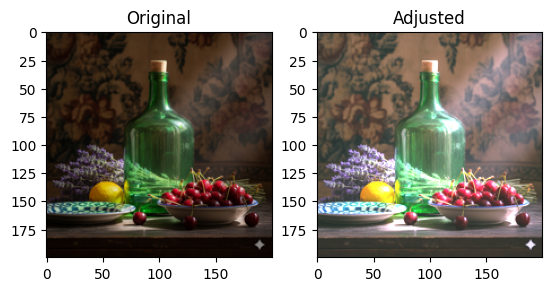

In [62]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(imgArr)   # 원본 (0~1 범위)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(np.clip(img_adjusted, 0, 1))  # 0~1 범위로 자르기
plt.title("Adjusted")
plt.show()


#### [1-3] url이미지 불러옴
- 다운로드: requests 등으로 이미지의 바이너리 데이터를 가져옵니다.
- 버퍼 생성: io.BytesIO(다운로드한_데이터)를 사용하여 이 데이터를 BytesIO 객체로 만듭니다.
- 처리: 이미지 라이브러리가 이 BytesIO 객체를 열어 이미지를 읽고 크기 조정, 필터 적용 등의 작업을 즉시 수행합니다.

      - 검색하여 정리
        - 바이너리 데이터란
        - IT에서 버퍼란
        - 딥러닝에서 버퍼란, 바이너리 데이터란
    

(512, 512)
RGB


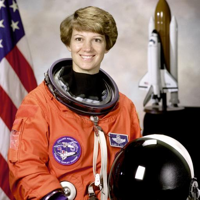

In [ ]:
from PIL import Image
import requests
from io import BytesIO

url = "https://raw.githubusercontent.com/pytorch/vision/main/gallery/assets/astronaut.jpg"
response = requests.get(url)

# BytesIO로 메모리 버퍼에 담기
image = Image.open(BytesIO(response.content))

# 확인
image.show()          # 시스템 기본 뷰어로 열기
print(image.size)     # (width, height)
print(image.mode)     # RGB 등 색상모드
image.resize((200,200))

## [2] OpenCV
- OpenCV(Open Source Computer Vision Library):

           - 이미지 및 비디오 처리, 그리고 컴퓨터 비전 알고리즘 개발을 위한 오픈 소스 라이브러리입니다.
           - 실시간 객체 인식, 추적, 2D/3D 특징점 검출 등 광범위한 기능을 제공하며, C++, Python, Java 등 다양한 언어를 지원합니다.
           - 딥러닝 시대에도 데이터셋 전처리, 시각화, 고전적인 이미지 처리 작업의 핵심 도구로 널리 사용됩니다.
          - pytorch의 Dataset 클래스 내부에서 사용
- 설치: 개인PC(로컬)에서 필요

            pip install opencv-python

- 이미지 분류(Image Classification)에서 전처리(preprocessing)는 모델이 이미지를 더 잘 이해하도록 돕는 매우 중요한 단계입니다.
- PyTorch와 같은 딥러닝 프레임워크는 텐서 기반의 효율적인 데이터 처리 및 증강 기능을 제공하지만,OpenCV (Open Source Computer Vision Library)는 이미지 및 영상 처리의 훨씬 더 넓고 깊은 영역을 커버하며, 딥러닝 전처리의 '밑바탕'이 되는 많은 기능을 제공하기 때문에 반드시 알아야 합니다.
- 구글검색 'openCV특징'


#### [2-1] 버전 및 패키지 확인

In [ ]:
##############################
## openCV 버전확인
##################################
import cv2
print(cv2.__version__)

4.12.0


- Name: 현재 시스템에 설치된 패키지의 공식 이름은 opencv-python**입니다. (파이썬 코드에서는 import cv2로 사용됨).
- Version:	설치된 OpenCV의 버전은 4.12.0.88입니다. (비교적 최신 버전으로, 다양한 기능 및 버그 수정이 포함되어 있습니다.)
- Summary:	이 패키지는 OpenCV의 Python 바인딩을 위한 래퍼(Wrapper)입니다. 즉, C++로 작성된 OpenCV 라이브러리를 파이썬에서 사용할 수 있도록 연결해주는 역할만 합니다.

        - 래퍼의 주된 목적은 기존의 코드나 시스템을 둘러싸서 사용자나 다른 프로그램이 이를 더 쉽게,
        안전하게, 또는 다르게 사용할 수 있도록 인터페이스를 제공하는 것입니다.
        - 원본: OpenCV 라이브러리의 핵심 기능은 C++ 언어로 구현되어 있습니다.
        - 래퍼: opencv-python은 C++ 코드를 파이썬 환경에서 import cv2로 가져와 사용할 수 있도록 해주는 중간 계층(바인딩) 역할을 합니다.
        - 결과: 덕분에 파이썬 개발자는 복잡한 C++ 코드를 몰라도 파이썬 문법만으로 OpenCV의 강력한 이미지 처리 기능을 활용할 수 있습니다.
- License	이 소프트웨어의 사용 및 배포 조건은 Apache 2.0 라이선스를 따릅니다. (상업적 사용이 자유로운 개방적인 라이선스입니다.)
  - 검색 'sw라이선스'

          - Apache License 2.0 (아파치 라이선스 2.0)은 Apache Software Foundation(ASF)에서 만든
          자유-관대한(Permissive Free Software) 소프트웨어 라이선스입니다.
          -  이는 사용자가 소프트웨어를 자유롭게 사용, 수정, 배포할 수 있도록 허용하는 것이 특징이며,
          기업 환경에서도 널리 채택됩니다.

In [ ]:
#################################
## 패키지 정보 확인
##################################
!pip show opencv-python

Name: opencv-python
Version: 4.12.0.88
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: numpy
Required-by: dopamine_rl


In [ ]:
###################################
## 참고: 패키지 정보확인 pandas
######################################
!pip show pandas

Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

#### [2-2]  이미지 불러오기: cv2.imread(filename, flags=cv2.IMREAD_COLOR)
  - filename: 불러올 이미지의 경로 (문자열) — 예: "img1.png", "C:/images/pic.jpg"
  - flag: 이미지를 어떻게 읽을지 지정하는 모드 옵션 (기본값: cv2.IMREAD_COLOR)
    - cv2.IMREAD_COLOR, 또는 숫자로 1  
      - 컬러 이미지로 읽음 (기본값). 알파 채널은 무시됨.
    - cv2.IMREAD_GRAYSCALE, 또는 숫자로	0
      - 흑백(단일 채널) 이미지로 읽음.
    - cv2.IMREAD_UNCHANGED 또는 숫자로 -1
      -	알파 채널 포함하여 원본 그대로 읽음 (RGBA 가능), 인공신경망에서는 특수한 경우에만 사용되며, png 투명채널에 대한 이해가 필요함으로  이 과정에서는 간단히만 확인
    - cv2.IMREAD_ANYCOLOR 또는 숫자로	4
      - 가능한 한 컬러로 읽음.
    - cv2.IMREAD_ANYDEPTH	또는 숫자로 2
      - 깊이(비트 수)가 다를 경우 가능한 깊이로 읽음 (예: 16-bit 이미지).

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1. 이미지 파일 이름 설정 (다운로드한 파일 이름으로 변경 필요)
file_name = 'img1.png'

# 2. 이미지 불러오기
# OpenCV는 이미지를 BGR 순서의 NumPy 배열로 불러옵니다.
img_bgr = cv2.imread(file_name) #cv2.IMREAD_COLOR, 또는 숫자로 1  생략되어 있음, 기본옵션값임
img_bgr.shape, img_bgr[0]

((1024, 1024, 3),
 array([[10, 18, 25],
        [10, 20, 28],
        [12, 21, 31],
        ...,
        [51, 56, 63],
        [50, 55, 62],
        [51, 56, 61]], dtype=uint8))

In [ ]:
###################################
## 흑백으로 불러오기
###################################
img_bgr = cv2.imread(file_name, 0) #cv2.IMREAD_GRAYSCALE, 또는 숫자로 0
img_bgr.shape, img_bgr[0]

((1024, 1024), array([19, 21, 22, ..., 57, 56, 56], dtype=uint8))

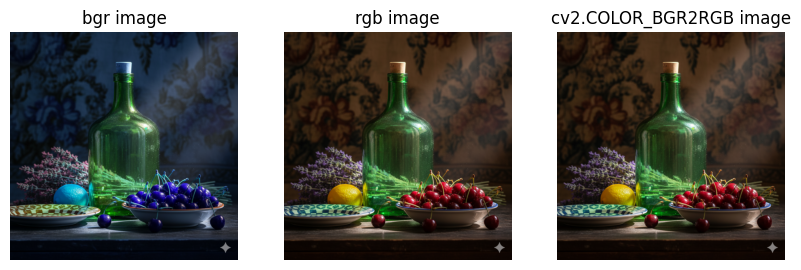

In [ ]:
#########################################
### openCV로 불러온 자료는 BGR의 형태로 되어 있음
## 구글 코렙에서는 openCV의 이미지 출력형태가 아닌
## matplotlib의 출력을 사용해야함.
## rgb를 bgr로 변환해서 출력해야함
####################################

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))  # 🔹 전체 그래프 크기 키우기

plt.subplot(1,3,1)
plt.imshow(img_bgr)
plt.axis('off')
plt.title('bgr image')


############################
## BGR로 되어 있는 채널을,  B=0, G=1, R=2
## RGB로 변형 [R=2, G=1, B=0]
###############################
rgb_img = img_bgr[:, :, [2, 1, 0]]


plt.subplot(1,3,2)
plt.imshow(rgb_img)
plt.axis('off')
plt.title('rgb image')

############################
# openCV는 bgr -> rgb로 변형해주는 명령이 있음
img_rgb_cv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.subplot(1,3,3)
plt.imshow(img_rgb_cv)
plt.axis('off')
plt.title('cv2.COLOR_BGR2RGB image')
plt.show()



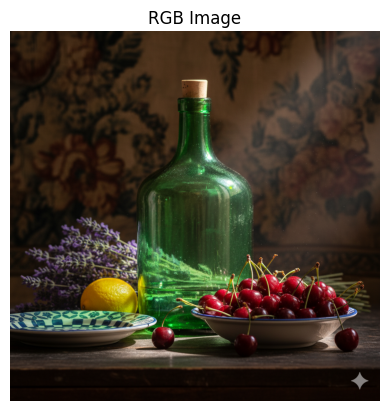

In [ ]:
######################################################
## 이미지를 불러와서 출력하는 openCV 코드 정리
######################################################
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('img1.png', cv2.IMREAD_COLOR) #  이미지 불러오기 (OpenCV는 BGR 형식)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR → RGB로 변환 (matplotlib은 RGB 형식)
plt.imshow(img_rgb)
plt.axis('off')
plt.title('RGB Image')
plt.show()


## [3] PyTorch의 torchvision.transforms.v2
- https://docs.pytorch.org/vision/main/auto_examples/transforms/plot_transforms_getting_started.html

-  이미지, 세그멘테이션 마스크, 바운딩 박스 등 다양한 데이터 유형에 일관되게 적용할 수 있게 만든 최신 전처리 API

          from torchvision import transforms as T

          preprocess = T.Compose([
              T.v2.ToImage(),                   # PIL Image를 PyTorch Image 타입으로
              T.v2.RandomResizedCrop(224),      # 크기 조절 및 무작위 자르기 (데이터 증강)
              T.v2.RandomHorizontalFlip(p=0.5), # 수평 뒤집기 (데이터 증강)
              T.v2.ToDtype(torch.float32, scale=True), # 텐서 변환 및 0.0-1.0 스케일링
              T.v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # 표준화
          ])
- 정규화 및 데이터 형식 변환 (Normalization & Data Type Conversion)
모델이 학습하기 가장 좋은 형태로 데이터를 최종적으로 준비하는 단계입니다.

          - ToDtype(dtype, scale=False): 입력 데이터를 지정된 dtype으로 변환(예: torch.float32). scale=True로 설정하면 픽셀 값을 스케일링(예: 0-255를 0.0-1.0으로)로 변
          - Normalize(mean, std): 데이터를 지정된 평균과 표준편차를 사용하여 표준화. 이는 모델 학습의 안정성을 크게 향상시킴
          - ToImage(): 입력 데이터(예: PIL Image, NumPy array)를 PyTorch의 전용 Image 타입으로 변환
          - ToImageTensor(): 입력 데이터를 PyTorch 텐서로 변환합니다.
- 크기 및 자르기 (Sizing & Cropping)

          - Resize(size): 이미지를 지정된 크기(size)로 조정. 일반적으로 CNN의 입력 요구 사항을 맞추는 데 사용
          - RandomResizedCrop(size): 임의의 크기와 비율로 이미지를 자른 후, 이를 지정된 크기로 조정, 데이터 증강에 유용
          - CenterCrop(size): 미지의 중심부를 지정된 크기(size)로 자릅니다.
          - FiveCrop(size) : 이미지의 네 모서리와 중앙을 자른 5개의 이미지 튜플을 반환합니다. 테스트 시 TTA(Test Time Augmentation)에 사용
- 색상 및 모양 변형 (Color & Appearance Transformations)

          - RandomHorizontalFlip(p=0.5): p 확률로 이미지를 수평으로 뒤집음. 가장 일반적인 데이터 증강 기법
          - RandomVerticalFlip(p=0.5): p 확률로 이미지를 수직으로 뒤집음
          - RandomRotation(degrees): 이미지를 무작위 각도 범위 내에서 회전
          - ColorJitter(...): 밝기(Brightness), 대비(Contrast), 채도(Saturation), 색조(Hue)를 무작위로 조절
          - RandomPerspective(distortion_scale=0.5, p=0.5): P확률로 원근 변형을 무작위로 적용합니다.
          - RandomAffine(...): 이미지에 무작위 회전, 병진 이동, 크기 조절, 전단(Shear) 변형을 적용합니다.
- 결합 및 복합 변환 (Composition)

        여러 변환 함수들을 리스트로 받아 순서대로 적용하는 파이프라인을 생성합니다. 일반적으로 전처리 단계의 시작점이 됩니다.
        

In [61]:
from PIL import Image
import torch
from torchvision.transforms import v2
import matplotlib.pyplot as plt

# 이미지 열기
img = Image.open('img1.png')

# 변환 정의
transform = v2.Compose([
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToImage(),  # PIL -> Tensor 로 변환. C,H,W로 변환
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 변환 적용
img_transformed = transform(img)
print(type(img_transformed))          # 자료형 확인
print(img_transformed.dtype)          # 데이터 타입 (예: torch.float32)
print(img_transformed.shape)          # 크기 (C, H, W)
print(img_transformed.min(), img_transformed.max())  # 픽셀 값 범위




<class 'torchvision.tv_tensors._image.Image'>
torch.float32
torch.Size([3, 224, 224])
tensor(-2.1179) tensor(2.6226)
